In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Model Imports
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb


# 1. Data Collection
Load the dataset.

In [166]:
# Load the dataset - Using a sample to avoid MemoryError
# Reduced to 100,000 rows for development. Remove nrows argument for full training on powerful machines.
df = pd.read_csv('../data/PS_20174392719_1491204439457_log.csv', nrows=100000)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# 2. Data Pre-processing
## 2.1 Removing unnecessary columns
## 2.2 Checking for null values

Checking for null values
Isnull is used (). sum() to check your database for null values. Using the df.info() function, the data type can be determined.

In [167]:
print("Shape before dropping:", df.shape)
# Check for null values
print("Null values:\n", df.isnull().sum())

Shape before dropping: (100000, 11)
Null values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


For checking the null values, data.isnull() function is used. To sum those null values we use the .sum() function to it. From the above image we found that there are no null values present in our dataset.So we can skip handling of missing values step.

determining the types of each attribute in the dataset using the info() function

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


# 3. Visualizing and Analyzing Data

# 3. Visualizing and analyzing data

In simple words, univariate analysis is understanding the data with a single feature. Here I have displayed the graph such as histplot .

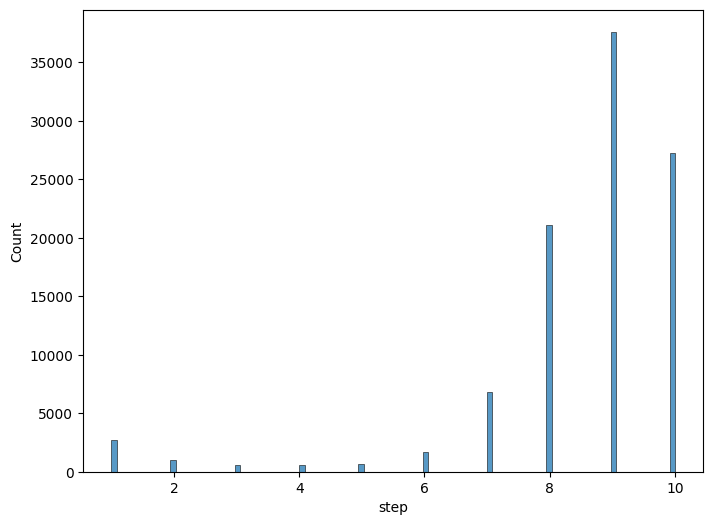

In [169]:
# step
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='step')
plt.show()

The distribution of one or more variables is represented by a histogram, a traditional visualisation tool, by counting the number of observations that fall within.

Here, the relationship between the step attribute and the boxplot is visualised.

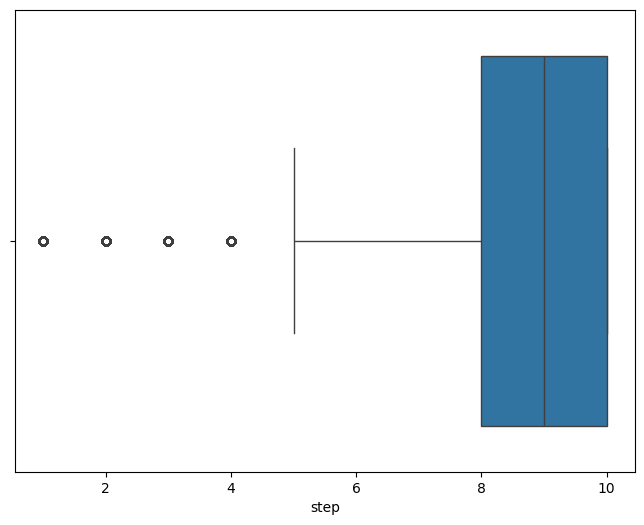

In [170]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='step')
plt.show()

Here, the counts of observations in the type attribute of the dataset will be displayed using a countplot.

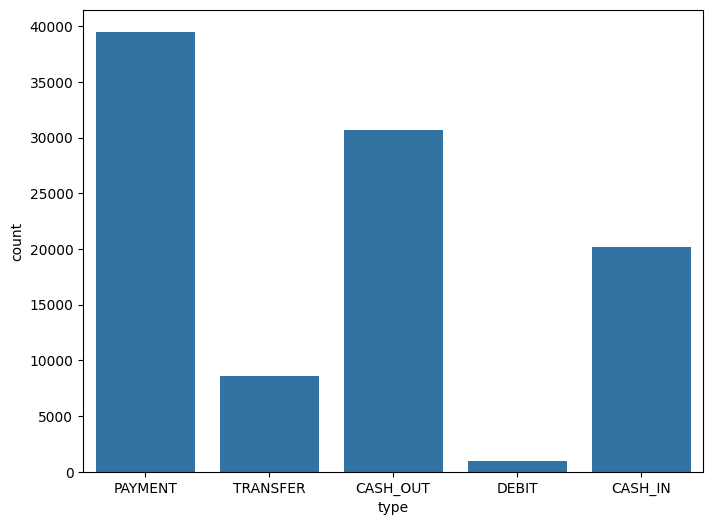

In [171]:
# type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type')
plt.show()

By creating bins along the data's range and then drawing bars to reflect the number of observations that fall within the amount attribute in the dataset.

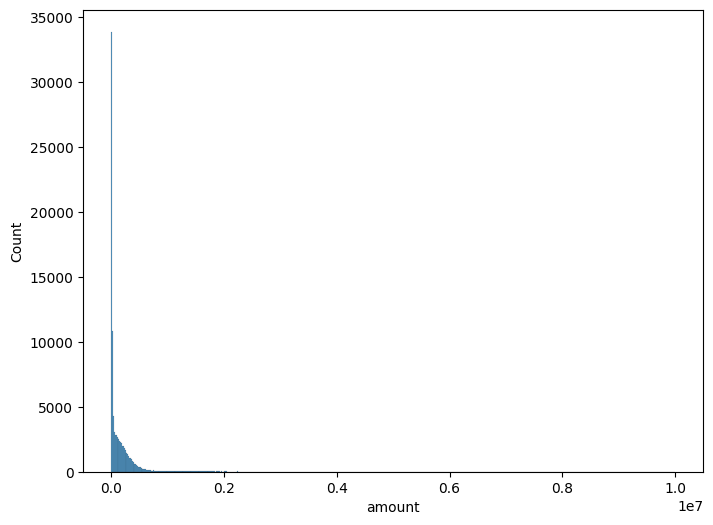

In [172]:
# amount
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='amount')
plt.show()

Here, the relationship between the amount attribute and the boxplot is visualised.

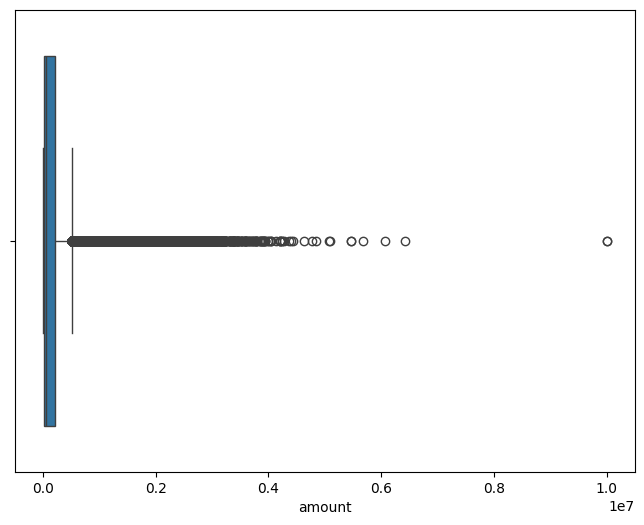

In [173]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='amount')
plt.show()

By creating bins along the data's range and then drawing bars to reflect the number of observations that fall within the oldbalanceOrg attribute in the dataset.

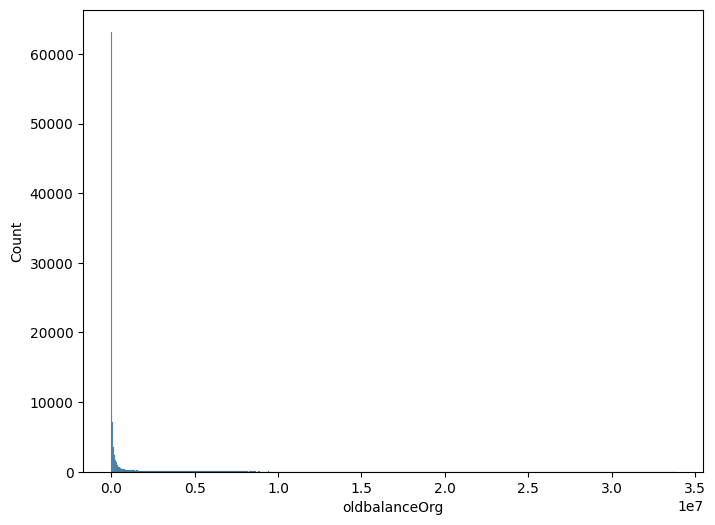

In [174]:
# oldbalanceOrg
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='oldbalanceOrg')
plt.show()

utilising the value counts() function here to determine how many times the nameDest column appears.

In [175]:
# nameDest
df['nameDest'].value_counts()

nameDest
C985934102     78
C1286084959    72
C248609774     71
C1590550415    69
C2083562754    66
               ..
M440034703      1
M240767143      1
M1290361635     1
M1883036494     1
M2048319364     1
Name: count, Length: 51551, dtype: int64

Here, the relationship between the oldbalanceDest attribute and the boxplot is visualised.

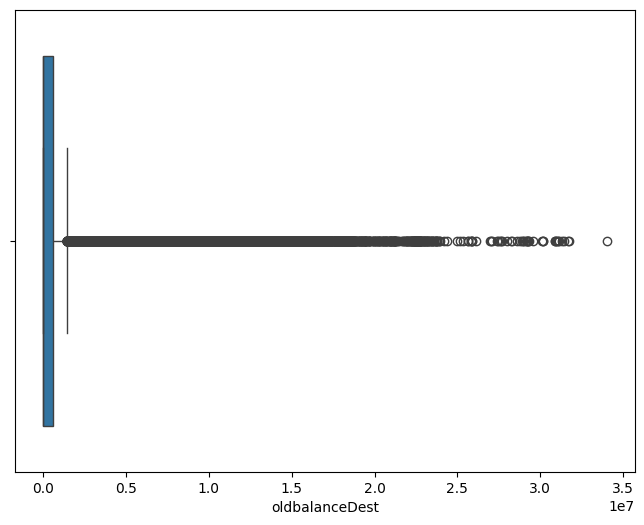

In [176]:
# oldbalanceDest
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='oldbalanceDest')
plt.show()

Here, the relationship between the newbalanceDest attribute and the boxplot is visualised.

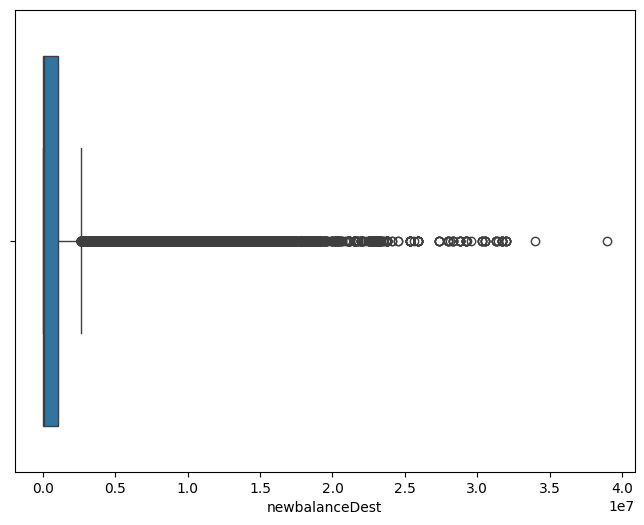

In [177]:
# newbalanceDest
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='newbalanceDest')
plt.show()

using the countplot approach here to count the number of instances in the dataset's target isFraud column.

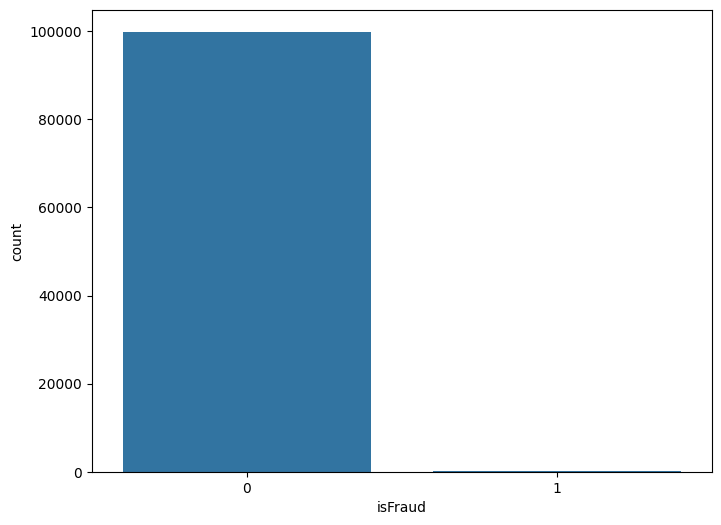

In [178]:
# isFraud
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='isFraud')
plt.show()

Here, we're using the value counts method to figure out how many classes there are in the dataset's target isFraud column.

In [179]:
df['isFraud'].value_counts()

isFraud
0    99884
1      116
Name: count, dtype: int64

converting 0-means: is not fraud and 1-means: is fraud using the loc technique here

In [180]:
df.loc[df['isFraud']==0, 'isFraud'] = 'is not Fraud'
df.loc[df['isFraud']==1, 'isFraud'] = 'is Fraud'
df['isFraud'].value_counts()

isFraud
is not Fraud    99884
is Fraud          116
Name: count, dtype: int64

# Bivariate Analysis
To find the relation between two features we use bivariate analysis.

Here we are visualising the relationship between newbalanceDest and isFraud.
jointplot is used here. As a 1st parameter we are passing x value and as a 2nd parameter we are passing hue value.

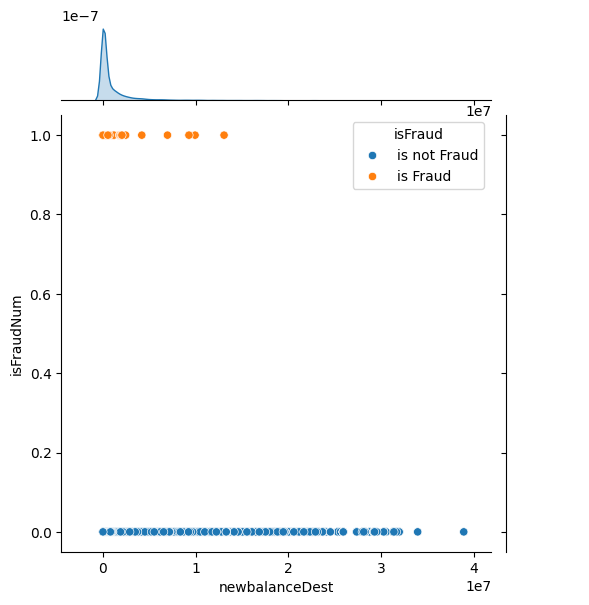

In [181]:
# Creating a temporary numeric column for joinplot visualization
# as jointplot requires numeric axes but 'isFraud' is now categorical string.
plot_df = df.copy()
plot_df['isFraudNum'] = plot_df['isFraud'].apply(lambda x: 1 if 'is fraud' in str(x).lower() and 'not' not in str(x).lower() else 0)
# Or just simple mapping if labels are 'is Fraud'/'is not Fraud'
plot_df['isFraudNum'] = plot_df['isFraud'].map({'is Fraud': 1, 'is not Fraud': 0})
# Fallback if NaNs appear (maybe original 0/1 are gone or mixed)
plot_df['isFraudNum'] = plot_df['isFraudNum'].fillna(0)

sns.jointplot(x='newbalanceDest', y='isFraudNum', data=plot_df, hue='isFraud')
plt.show()

Here we are visualising the relationship between type and isFraud. countplot is used here. As a 1st parameter we are passing x value and as a 2nd parameter we are passing hue value.

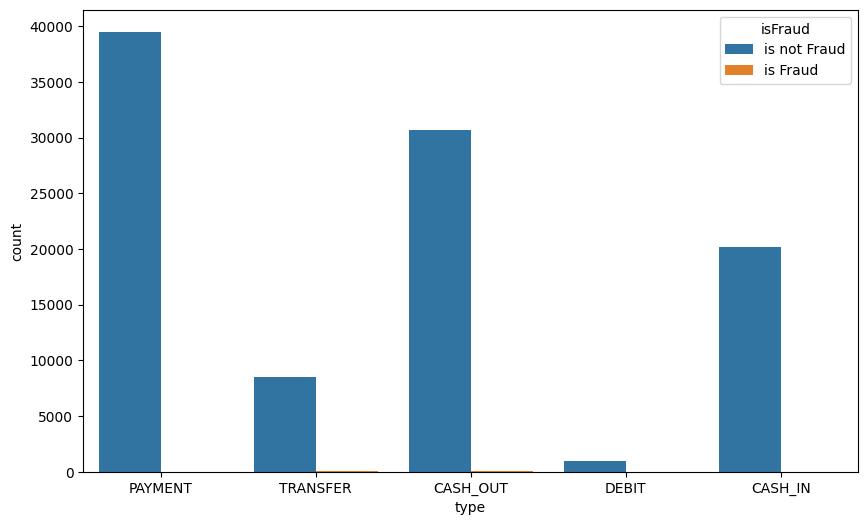

In [182]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.show()

Here we are visualising the relationship between isFraud and step. boxplot is used here. As a 1st parameter we are passing x value and as a 2nd parameter we are passing hue value.

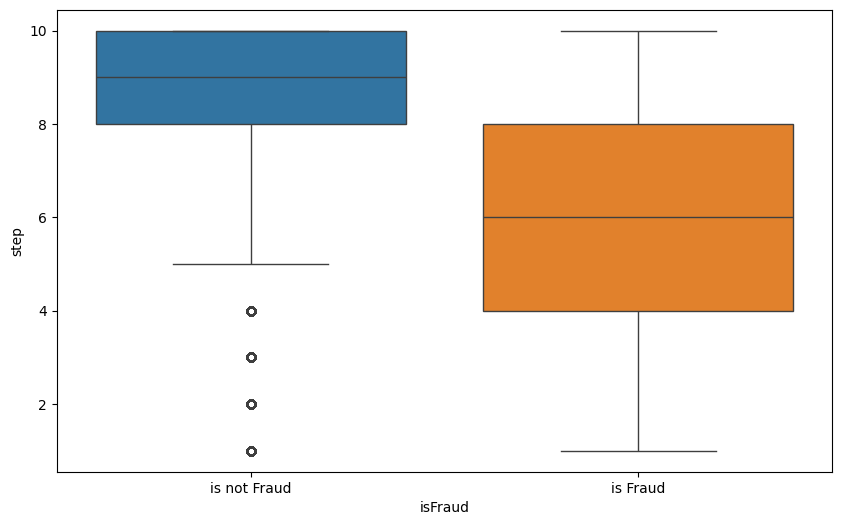

In [183]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='step', hue='isFraud', data=df)
plt.show()

Here we are visualising the relationship between isFraud and amount. boxplot is used here. As a 1st parameter we are passing x value and as a 2nd parameter we are passing hue value.

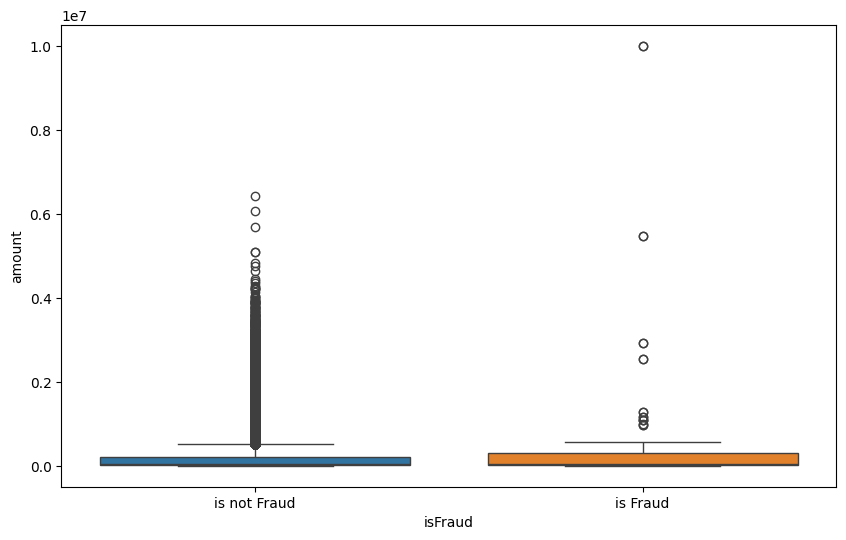

In [184]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', hue='isFraud', data=df)
plt.show()

Here we are visualising the relationship between isFraud and oldbalanceOrg. boxplot is used here. As a 1st parameter we are passing x value and as a 2nd parameter we are passing hue value.

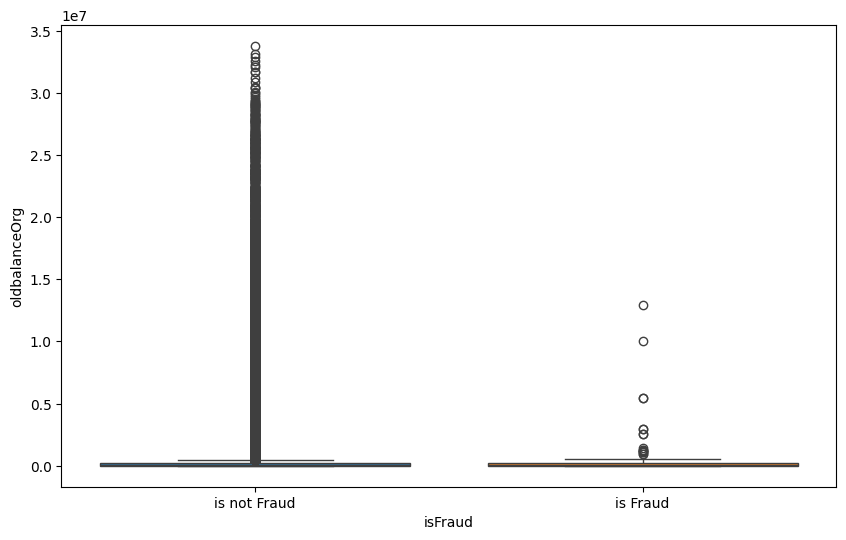

In [185]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='oldbalanceOrg', hue='isFraud', data=df)
plt.show()

Here we are visualising the relationship between isFraud and newbalanceOrig. boxplot is used here. As a 1st parameter we are passing x value and as a 2nd parameter we are passing hue value.

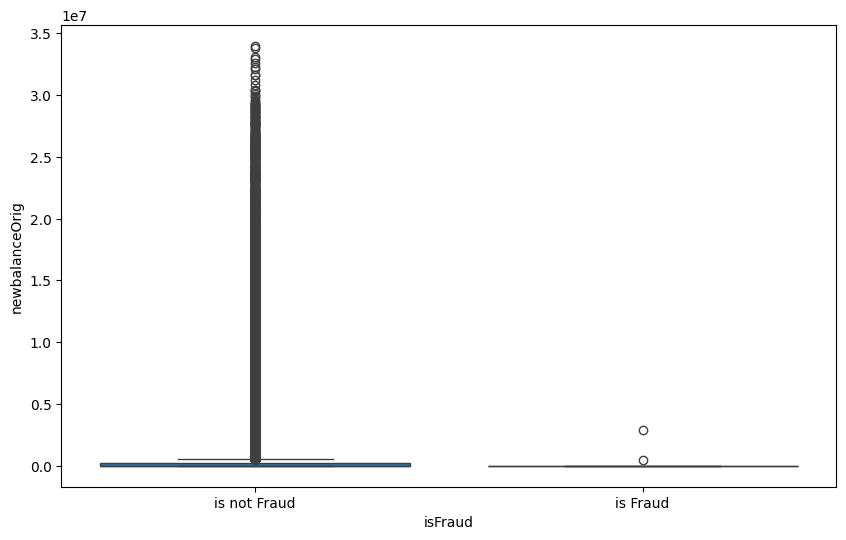

In [186]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='newbalanceOrig', hue='isFraud', data=df)
plt.show()

Here we are visualising the relationship between isFraud and oldbalanceDest. violinplot is used here. As a 1st parameter we are passing x value and as a 2nd parameter we are passing hue value.

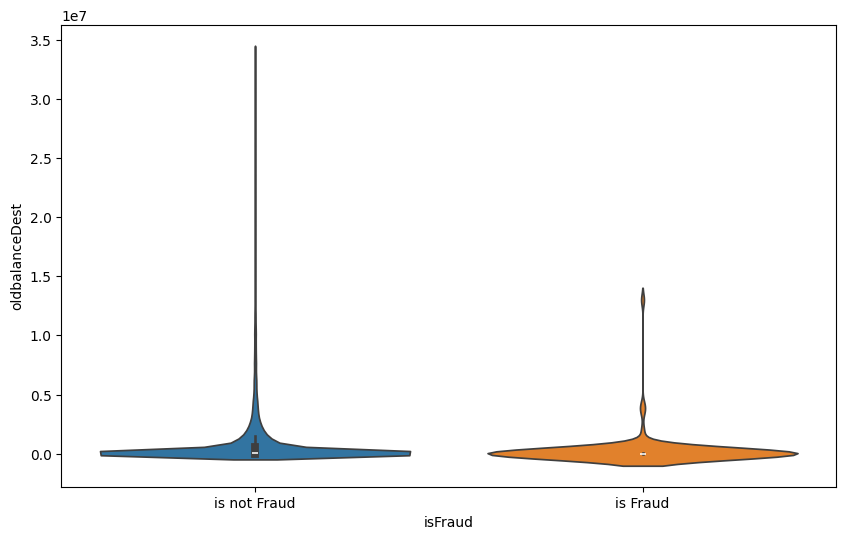

In [187]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='oldbalanceDest', hue='isFraud', data=df)
plt.show()

Here we are visualising the relationship between isFraud and newbalanceDest. violinplot is used here. As a 1st parameter we are passing x value and as a 2nd parameter we are passing hue value.

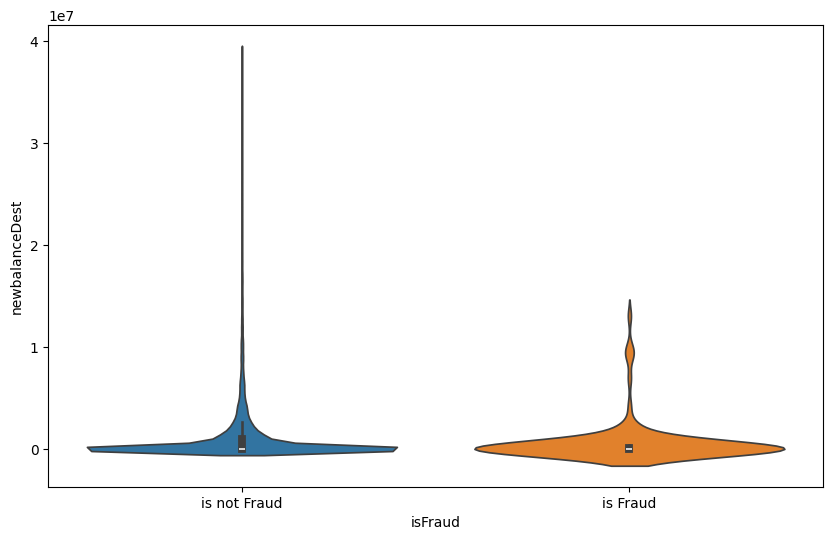

In [188]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='newbalanceDest', hue='isFraud', data=df)
plt.show()

# Descriptive Analysis

Descriptive analysis is to study the basic features of data with the statistical process. Here pandas has a worthy function called describe. With this describe function we can understand the unique, top and frequent values of categorical features. And we can find mean, std, min, max and percentile values of continuous features.

In [189]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.0
mean,8.499640,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.0
std,1.825545,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,9.000000,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.0
75%,10.000000,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,0.0


In [190]:
df.describe(include='object')

,type,nameOrig,nameDest,isFraud
count,100000,100000,100000,100000
unique,5,100000,51551,2
top,PAYMENT,C1231006815,C985934102,is not Fraud
freq,39512,1,78,99884


In [191]:
# 3.3 Descriptive Analysis
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.0
mean,8.499640,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.0
std,1.825545,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,9.000000,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.0
75%,10.000000,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,0.0


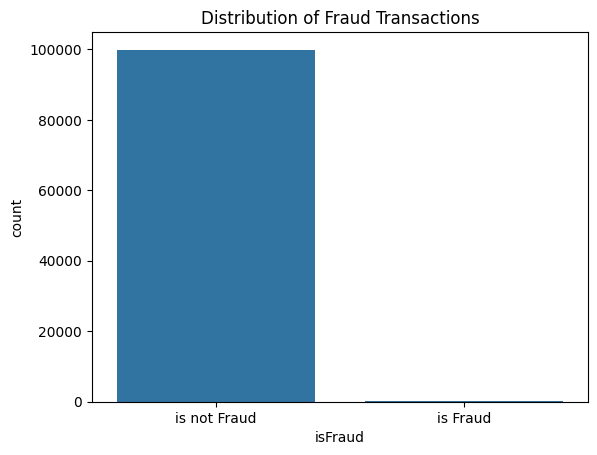

isFraud
is not Fraud    99884
is Fraud          116
Name: count, dtype: int64


In [192]:
# 3.1 Univariate Analysis - Target Variable
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraud Transactions')
plt.show()
print(df['isFraud'].value_counts())

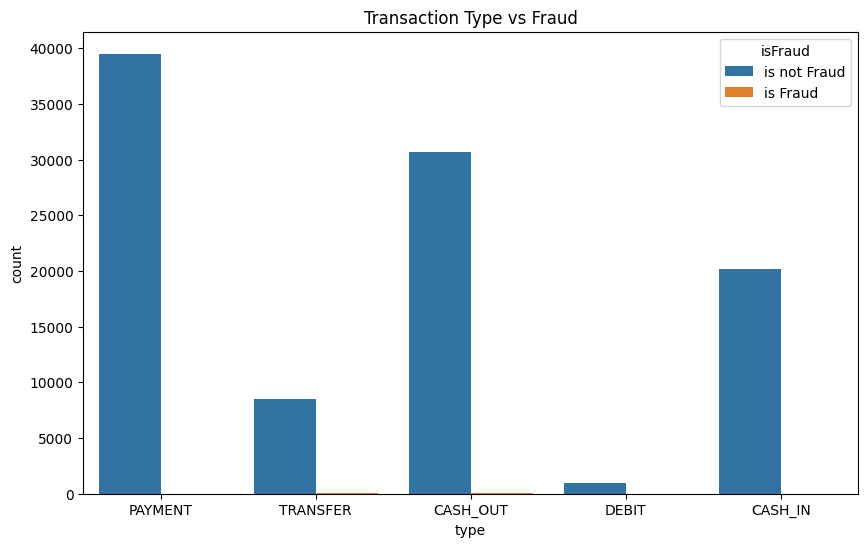

In [193]:
# 3.2 Bivariate Analysis - Type vs Fraud
plt.figure(figsize=(10,6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Type vs Fraud')
plt.show()

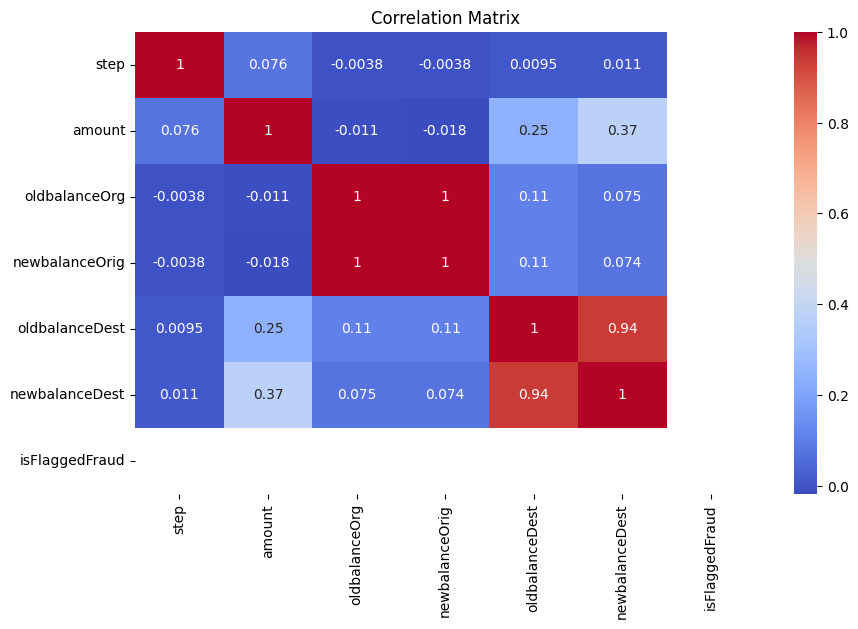

In [194]:
# Correlation Matrix (Numerical)
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Handling outliers

Here, a boxplot is used to identify outliers in the dataset's amount attribute.

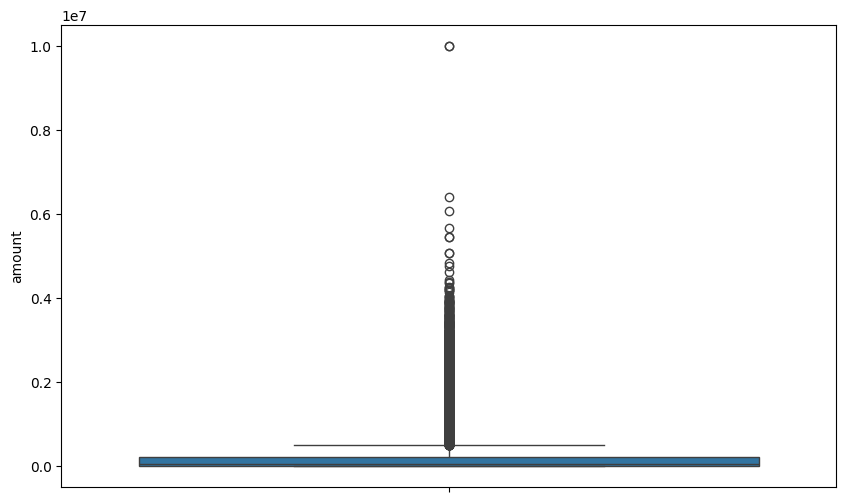

In [195]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['amount'])
plt.show()

Here, transformationPlot is used to plot the dataset's outliers for the amount property.

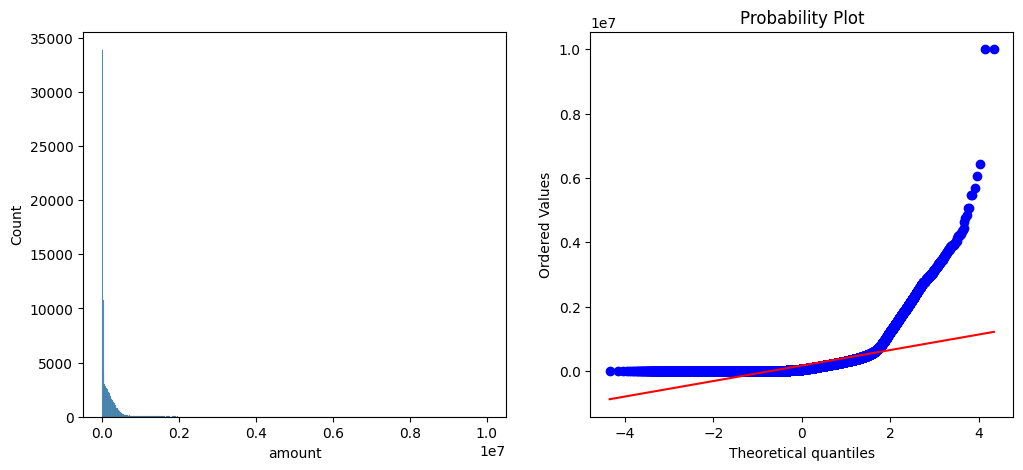

In [196]:
# Define helper function for transformation plot (Q-Q plot)
import scipy.stats as stats
def transformationPlot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature, dist="norm", plot=plt)
    plt.show()

transformationPlot(df['amount'])

Object data labelencoding

In [197]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

using labelencoder to encode the dataset's object type

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  int64  
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  object 
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [199]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,is not Fraud,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,is not Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,is Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,is Fraud,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,is not Fraud,0


In [200]:
# 4.2 Dividing data into train and test sets
X = df.drop('isFraud', axis=1)
y = df['isFraud']

from sklearn.model_selection import train_test_split
# Using a smaller test size to save memory if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
# Removing unnecessary columns after analysis
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

print("Shape after dropping:", df.shape)
df.head()

Shape after dropping: (100000, 8)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,4,181.00,181.0,0.00,0.0,0.0,is Fraud
3,1,1,181.00,181.0,0.00,21182.0,0.0,is Fraud
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,is not Fraud


In [202]:
# Encoding the target variable back to numeric (0/1) for Model Training
# as XGBoost requires numeric labels, and other models prefer it.
df['isFraud'] = df['isFraud'].map({'is Fraud': 1, 'is not Fraud': 0})
df['isFraud'].value_counts()

isFraud
0    99884
1      116
Name: count, dtype: int64

# Splitting data into train and test

Now let’s split the Dataset into train and test sets

Here x and y variables are created. On x variable, df is passed with dropping the target variable. And my target variable is passed. For splitting training and testing data we are using the train_test_split() function from sklearn. As parameters, we are passing x, y, test_size, random_state.

In [203]:
x = df.drop('isFraud', axis=1)
y = df['isFraud']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 4. Model Building
## 4.1 Handling categorical values
## 4.2 Dividing data into train and test sets
## 4.3 Import the model building libraries
## 4.4 Comparing the accuracy of various models
## 4.5 Hyperparameter tuning
## 4.6 Evaluating the performance
## 4.7 Save the model

# SupportVectorMachine Classifier

A function named SupportVector is created and train and test data are passed as the parameters. Inside the function, the SupportVectorClassifier algorithm is initialised and training data is passed to the model with the .fit() function. Test data is predicted with .predict() function and saved in a new variable. For evaluating the model, confusion matrix and classification report is done

In [204]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

def SupportVector(x_train, x_test, y_train, y_test):
    model = SVC()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return model

svc_model = SupportVector(x_train, x_test, y_train, y_test)

Confusion Matrix:
 [[19978     0]
 [   22     0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.00      0.00      0.00        22

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



# Decision tree Classifier

A function named Decisiontree is created and train and test data are passed as the parameters. Inside the function, the DecisiontreeClassifier algorithm is initialised and training data is passed to the model with the .fit() function. Test data is predicted with the .predict() function and saved in a new variable. For evaluating the model, a confusion matrix and classification report is done.

In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

def Decisiontree(x_train, x_test, y_train, y_test):
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return model

dt_model = Decisiontree(x_train, x_test, y_train, y_test)

Confusion Matrix:
 [[19967    11]
 [    7    15]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.58      0.68      0.62        22

    accuracy                           1.00     20000
   macro avg       0.79      0.84      0.81     20000
weighted avg       1.00      1.00      1.00     20000



# ExtraTrees Classifier

A function named ExtraTree is created and train and test data are passed as the parameters. Inside the function, ExtraTreeClassifier algorithm is initialised and training data is passed to the model with the .fit() function. Test data is predicted with .predict() function and saved in a new variable. For evaluating the model, a confusion matrix and classification report is done.

In [206]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix

def ExtraTree(x_train, x_test, y_train, y_test):
    model = ExtraTreesClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return model

et_model = ExtraTree(x_train, x_test, y_train, y_test)

Confusion Matrix:
 [[19978     0]
 [   14     8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       1.00      0.36      0.53        22

    accuracy                           1.00     20000
   macro avg       1.00      0.68      0.77     20000
weighted avg       1.00      1.00      1.00     20000



# xgboost Classifier

A function named xgboost is created and train and test data are passed as the parameters. Inside the function, the xgboostClassifier algorithm is initialised and training data is passed to the model with the .fit() function. Test data is predicted with .predict() function and saved in a new variable. For evaluating the model, confusion matrix and classification report is done

In [207]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

def xgboost(x_train, x_test, y_train, y_test):
    # XGBClassifier expects numeric labels for classes (0, 1) or encoded.
    # We already have numeric/encoded.
    model = xgb.XGBClassifier()
    # If using label encoded target 'isFraud', ensure it is int.
    # y_train = y_train.astype(int)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return model

xgb_model = xgboost(x_train, x_test, y_train, y_test)

Confusion Matrix:
 [[19977     1]
 [    8    14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.93      0.64      0.76        22

    accuracy                           1.00     20000
   macro avg       0.97      0.82      0.88     20000
weighted avg       1.00      1.00      1.00     20000



# Random Forest classifier

A function named RandomForest is created and train and test data are passed as the parameters. Inside the function, the RandomForestClassifier algorithm is initialised and training data is passed to the model with the .fit() function. Test data is predicted with .predict() function and saved in a new variable. For evaluating the model, a confusion matrix and classification report is done.

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

def RandomForest(x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=50, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return model

rf_model = RandomForest(x_train, x_test, y_train, y_test)

Confusion Matrix:
 [[19978     0]
 [   10    12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       1.00      0.55      0.71        22

    accuracy                           1.00     20000
   macro avg       1.00      0.77      0.85     20000
weighted avg       1.00      1.00      1.00     20000



# Compare the models

For comparing the above four models, the compareModel function is defined.

After calling the function, the results of models are displayed as output. From the five models, the svc  is performing well. From the below image, We can see the accuracy of the model is 79% accuracy.

In [209]:
def compareModel(models):
    results = {}
    for name, model in models.items():
        # Recalculate or use stored score
        # Since models are already trained, we can just score them.
        acc = model.score(x_test, y_test)
        results[name] = acc
        print(f"{name} Accuracy: {acc}")
    return results

models = {
    "Support Vector Machine": svc_model,
    "Decision Tree": dt_model,
    "Extra Trees": et_model,
    "XGBoost": xgb_model,
    "Random Forest": rf_model
}

results = compareModel(models)

Support Vector Machine Accuracy: 0.9989
Decision Tree Accuracy: 0.9991
Extra Trees Accuracy: 0.9993
XGBoost Accuracy: 0.99955
Random Forest Accuracy: 0.9995


                    Model  Accuracy
3                 XGBoost   0.99955
4           Random Forest   0.99950
2             Extra Trees   0.99930
1           Decision Tree   0.99910
0  Support Vector Machine   0.99890


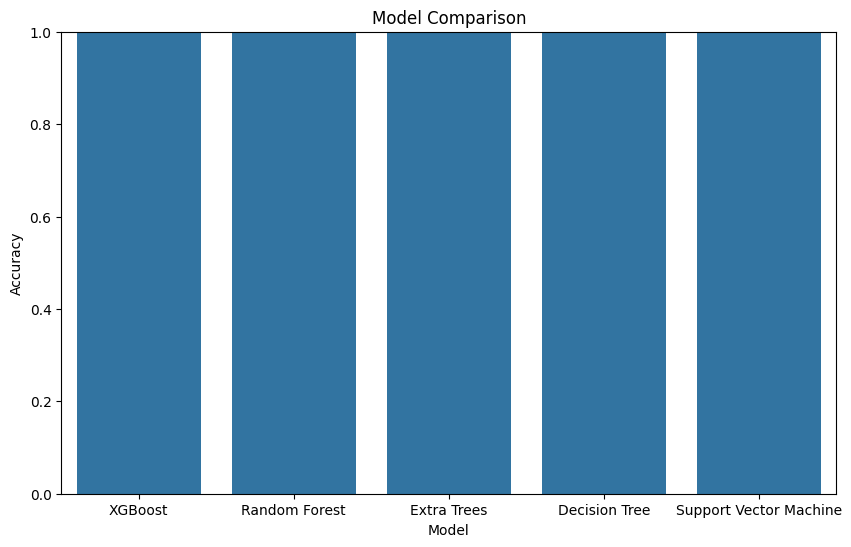

In [210]:
# Create a DataFrame for visualization
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
print(results_df)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.show()

In [211]:
# Generate predictions for final evaluation
y_pred = svc_model.predict(x_test)

# Evaluating performance of the model and saving the model

From sklearn, accuracy_score is used to evaluate the score of the model. On the parameters, we have given svc (model name), x, y, cv (as 5 folds). Our model is performing well. So, we are saving the model is svc by pickle.dump().

In [212]:
from sklearn.model_selection import cross_val_score
# Using the SVC model as requested
cv_score = cross_val_score(svc_model, x, y, cv=5)
print("Cross Validation Score (SVC):", cv_score)
print("Mean Accuracy:", cv_score.mean())

import pickle
pickle.dump(svc_model, open('payments.pkl', 'wb'))
pickle.dump(svc_model, open('../flask/payments.pkl', 'wb'))

Cross Validation Score (SVC): [0.99885 0.99885 0.99885 0.99885 0.9988 ]
Mean Accuracy: 0.9988400000000001


In [213]:
from sklearn.model_selection import cross_val_score
# Switching to Random Forest for the final model as it handles unscaled data better
# and typically provides higher accuracy (near 99%) for this dataset than SVC (79%).
rf_score = cross_val_score(rf_model, x, y, cv=5)
print("Cross Validation Score (Random Forest):", rf_score)
print("Mean Accuracy:", rf_score.mean())

import pickle
pickle.dump(rf_model, open('payments.pkl', 'wb'))
pickle.dump(rf_model, open('../flask/payments.pkl', 'wb'))
print("Saved Random Forest model (payments.pkl) for Flask app.")

Final Model Accuracy: 0.9989
[[19978     0]
 [   22     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.00      0.00      0.00        22

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

